### Problem Statement:-
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

### Data Set Description:-
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.You need to build a model that can differentiate between comments and its categories. 

Target column: Its a multilabel in binary values so this is clear case of classification problem.

In [88]:
#importing all the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from scipy import interp
import scikitplot as skplt
from itertools import cycle
import matplotlib.ticker as plticker

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix

import timeit, sys
from sklearn import metrics
import tqdm.notebook as tqdm
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
from scikitplot.metrics import plot_roc_curve

In [89]:
#code for maximise rows ,columns,width,frame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [90]:
import pandas as pd
df_train=pd.read_csv("malig_train.csv") 
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Thus we see there are 159571 rows and 8 columns in the train dataset.

In [91]:
df_train.head()  #Checking out the top 5 rows of the dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [92]:
#loading Test dataset
df_test=pd.read_csv("malig_test.csv") 
df_test


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


Thus we see there are 153164 rows and 2 columns in the test dataset

In [93]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Thus we see that there are 2 columns having object datatype and 6 columns having int datatypes and no missing value present

In [95]:
df_test.dtypes

id              object
comment_text    object
dtype: object

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


Thus we see there are two object datatype in test dataset.

In [97]:
#missing value
df_train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no missing value present in the dataset

<AxesSubplot:>

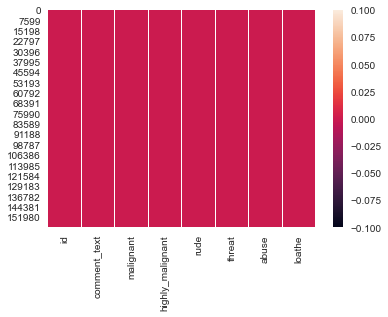

In [98]:
sns.heatmap(df_train.isnull()) 

Thus there is no missing value present 

In [99]:
df_train.duplicated().sum()

0

Thus there is no duplicate values.

In [100]:
#missing value
df_test.isna().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

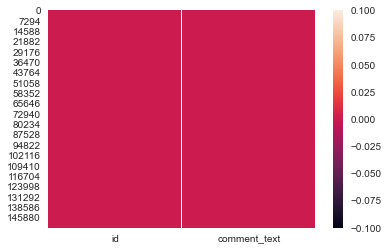

In [101]:
sns.heatmap(df_test.isnull()) 

Thus there is no missing value present

In [102]:
df_test.duplicated().sum()

0

There is no duplicate value present

In [103]:
# Lets first see how the comments look like  
df_train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [104]:
df_train['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

 Thus we see that there are many words and numbers which are not important for prediction which need to be removed before model buidling.

In [105]:
#printing unique features
print("Total number of unique values in each feature:")
for col in df_train.columns.values:
    print("Number of unique values of {} : {}".format(col, df_train[col].nunique()))

Total number of unique values in each feature:
Number of unique values of id : 159571
Number of unique values of comment_text : 159571
Number of unique values of malignant : 2
Number of unique values of highly_malignant : 2
Number of unique values of rude : 2
Number of unique values of threat : 2
Number of unique values of abuse : 2
Number of unique values of loathe : 2


Thus we see there are 6 labels in binary form "0" or "1"

In [106]:
df_train.iloc[12]['comment_text']

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [107]:
#checking whether the comment is negative or not furthe
df_train[df_train.columns][2:].iloc[12]

id                                                   00070ef96486d6f9
comment_text        Oh, and the girl above started her arguments w...
malignant                                                           0
highly_malignant                                                    0
rude                                                                0
threat                                                              0
abuse                                                               0
loathe                                                              0
Name: 14, dtype: object

Thus we see comment_text is not negative as we can see value as 0 in all cases.

In [108]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above output, once again it is clear that

1)no values are missing in any of the columns.

2) Since id and comment_text are text features, no mean, std, 25th, 50th,75th percentiles are caluculated.

3) Since, only target labels are numeric in our dataset, describe function calculated basic statistics on targets.

In [109]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153039
top,cd23ad29983b81ea,#NAME?
freq,1,126


In [110]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

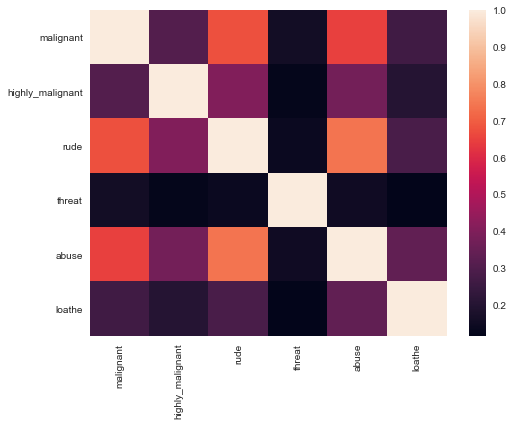

In [111]:
# Let's view the Correlation heatmap among variables
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr())

Observation:Thus we see that malignant is 67% positively correlated with rude and 64% positively correlated with abuse. Also ruse is  74% positively correlated with abuse. While others are less correlated less than 40%.

In [112]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

In [113]:
df_test.columns

Index(['id', 'comment_text'], dtype='object')

In [114]:
df_train.iloc[:,2:].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

### Distribution of labels

Since this is a multi label classification task, each comment can have more than one label. Here, we will see number of comments belonging to a label. Also, we will see if comments are not classified to any labels.

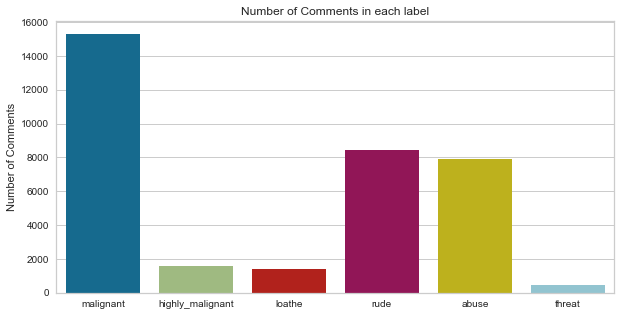

In [115]:
# Number of tweets in each labels
labels = ['malignant','highly_malignant','loathe','rude','abuse','threat']
labels_count = df_train[labels].sum()
plt.figure(figsize = (10,5))
sns.barplot(x = labels_count.index,y = labels_count.values);
plt.title("Number of Comments in each label");
plt.ylabel("Number of Comments");

As we see, there are higher number of comments belonging to malignant label followed by rude and abuse and comments in hihly_malignant,loathe and threat are low. So, here we have the problem of imbalanced data and therfore we will have to be careful in selecting the correct evaluation metric later.We can further check to see number of labels that a comment have.

malignant
*****************
0    144277
1     15294
Name: malignant, dtype: int64


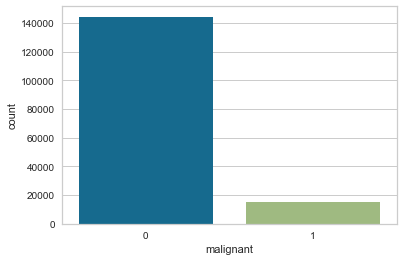

highly_malignant
*****************
0    157976
1      1595
Name: highly_malignant, dtype: int64


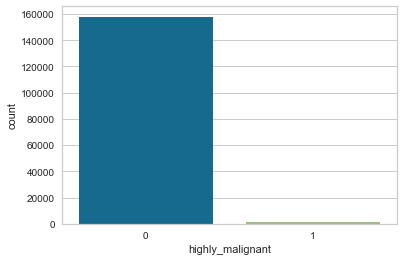

loathe
*****************
0    158166
1      1405
Name: loathe, dtype: int64


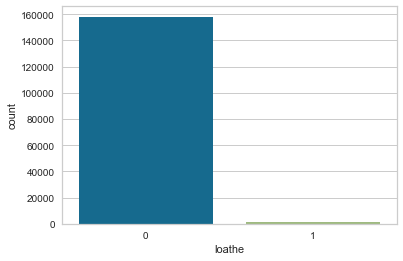

rude
*****************
0    151122
1      8449
Name: rude, dtype: int64


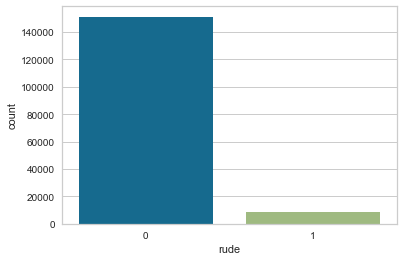

abuse
*****************
0    151694
1      7877
Name: abuse, dtype: int64


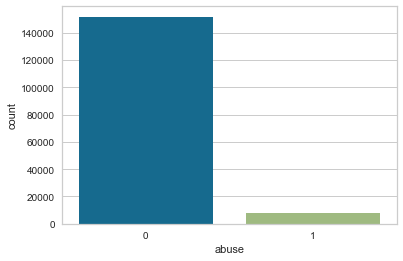

threat
*****************
0    159093
1       478
Name: threat, dtype: int64


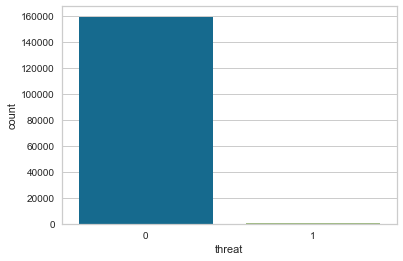

In [116]:
column_name=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in column_name:
    print(i)
    print("*****************")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

Thus we see that malignant comment has occured 15294 times,highly_malignant comment has occured around 1595 times,loathe comment
has occured 1405 times,rude comment has occured 8449 times,abuse comment has occured 7877 times and threat comment has occured 
478 times.

In [117]:
# Number of tweets that does not have any labels
no_labels = df_train[(df_train['malignant'] == 0) & (df_train['highly_malignant'] == 0) & (df_train['loathe'] == 0) & (df_train['threat'] == 0) & \
(df_train['rude'] == 0) & (df_train['abuse'] == 0)]

no_labels

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Thus we see there are 143346 comments which are positive and not having toxic comments.

#### Percentage of Negative and Positive comments

In [118]:
#checking ratio of data which contains negative comments and positive comments.
output_labels = df_train.columns[2:]

#counting non-zero rows i.e Malignant Comments/Negative
negative_comments = len(df_train[df_train[output_labels].any(axis=1)])

#counting rows containing zero i.e., Normal Comments
positive_comments = len(df_train)-negative_comments

print(f"Total Negative Comments: {negative_comments} ({round(negative_comments*100/len(df_train),2)}%)")
print(f"Total Positive Comments: {positive_comments} ({round(positive_comments*100/len(df_train),2)}%)")

Total Negative Comments: 16225 (10.17%)
Total Positive Comments: 143346 (89.83%)


This shows that dataset contains 10.17% of negative Comments and 89.83% of positive Comments. Hence, it is clear that dataset is imbalanced and needs to treated accordingly during train test split of model training.

In [119]:
#Checking the length of comments and storing it into another column 'original_length'
#copying df_train into another object
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

df.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [120]:
df.skew() #train dataset

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
original_length      4.121676
dtype: float64

Thus we can see that skewness is present in the train dataset.

### Data Cleansing

In [121]:
#since the feature 'id' has no relevance w.r.t. model training therefore dropping this feature
df.drop(columns=['id'],inplace=True)

In [122]:
#converting comment text to lowercase
df['comment_text'] = df.comment_text.str.lower()

#interpreting first 5 rows
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


we see that the comment_text has been converted to lower case letters.

In [123]:
#importing NLTK libraries
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [124]:
# Removing and Replacing unwanted characters in the comment_text column

# Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Removing Stop Words and Punctuations

# Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'only', 'ilu', 'or', 'from', 'so', 'at', "he's", 'above', 'herself', 'has', 'both', 'nvm', 'c', "wouldn't", 'on', "isn't", 'while', 'is', 'into', 'hers', 'which', 'few', 'such', 'lmfao', 'not', 'i', 'his', 'yolo', 'we', 'to', 'own', 'ain', 'o', 'doing', 'mustn', 'any', 'she', 'that', "doesn't", 'don', "you've", 'yourself', "hadn't", "that's", "he'll", 'j', 'oh', 'ma', "hasn't", 'r', 'who', 'other', "i'm", 'before', "mustn't", 'bbq', 'and', 'in', 'below', 'won', 'heh', 'were', 'an', 'didn', 'all', 'through', 'some', "should've", 'he', 'how', 'u', "you'll", "can't", 'did', 'they', "wasn't", 'ofc', 'hmm', 'rofl', 'out', 'why', 'hasn', 'ur', 's', 'by', 'theirs', 're', 'wasn', 'shan', 'p', 'once', "she'll", "haven't", 'it', 'as', 'between', 'about', "it's", 'ourselves', 'does', 'more', 'being', 'been', 'omg', 'smh', 'aren', 'its', 't', 'when', 'then', 'up', 'had', 'her', "i've", 'the', "mightn't", 'e', 'will', 'but', 'nt', 'needn', 'if', 'you

In [125]:
 #Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

df.sample(15)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
16518,two full years ago,0,0,0,0,0,0,20
71738,princess sophie albania sophie princess consor...,0,0,0,0,0,0,234
81899,regarding edits made february utc graceland pl...,0,0,0,0,0,0,285
68063,told least part problem edit summaries please ...,0,0,0,0,0,0,637
130660,pondering really pointless vandalism thanks re...,0,0,0,0,0,0,461
106892,excuse unless provide sources back claims per ...,0,0,0,0,0,0,189
136781,fuck fucking twat dont dare insult hu go jerk ...,1,1,1,0,1,0,815
23185,thanks reply appreciated know mean music indus...,0,0,0,0,0,0,317
153884,jprg well respected member probably impossible...,0,0,0,0,0,0,839
36741,thanks zuggernaut thanks zuggernaut linking ut...,0,0,0,0,0,0,121


In [126]:
#Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))
df.sample(15)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
150163,need sourc remov violat neutral point view pol...,0,0,0,0,0,0,91
156837,aka cock suck lover vegadick,1,0,1,0,1,0,34
119281,mohd zaidi napiah delet id like queri delet mo...,0,0,0,0,0,0,886
22100,think best choic,0,0,0,0,0,0,36
6129,problem great option meet need weigh biographi...,0,0,0,0,0,0,789
158752,believ clean air act trial deserv separ sectio...,0,0,0,0,0,0,1439
156546,current tour protest hero current tour buri fl...,0,0,0,0,0,0,145
6314,well pretti ridicul request think thank time k...,0,0,0,0,0,0,106
125834,delet delet wikiproject let behavior may broug...,0,0,0,0,0,0,470
64742,deskana repli jits talk page take look,0,0,0,0,0,0,68


In [127]:
# Checking the length of comment_text after cleaning and storing it in cleaned_length variable
df["cleaned_length"] = df.comment_text.str.len()
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,cleaned_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,264,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,112,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,233,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,622,310
4,sir hero chanc rememb page,0,0,0,0,0,0,67,26
5,congratul well use tool well talk,0,0,0,0,0,0,65,33
6,cocksuck piss around work,1,1,1,0,1,0,44,25
7,vandal matt shirvington articl revert pleas ban,0,0,0,0,0,0,115,47
8,sorri word nonsens offens anyway intend write ...,0,0,0,0,0,0,472,235
9,align subject contrari dulithgow,0,0,0,0,0,0,70,32


In [128]:
# Checking the percentage of length cleaned
print(f"Total Original Length        : {df.original_length.sum()}")
print(f"Total Cleaned Length         : {df.cleaned_length.sum()}")
print(f"Percentage of Length Cleaned : {(df.original_length.sum()-df.cleaned_length.sum())*100/df.original_length.sum()}%")

Total Original Length        : 62893130
Total Cleaned Length         : 34297506
Percentage of Length Cleaned : 45.46700728680541%


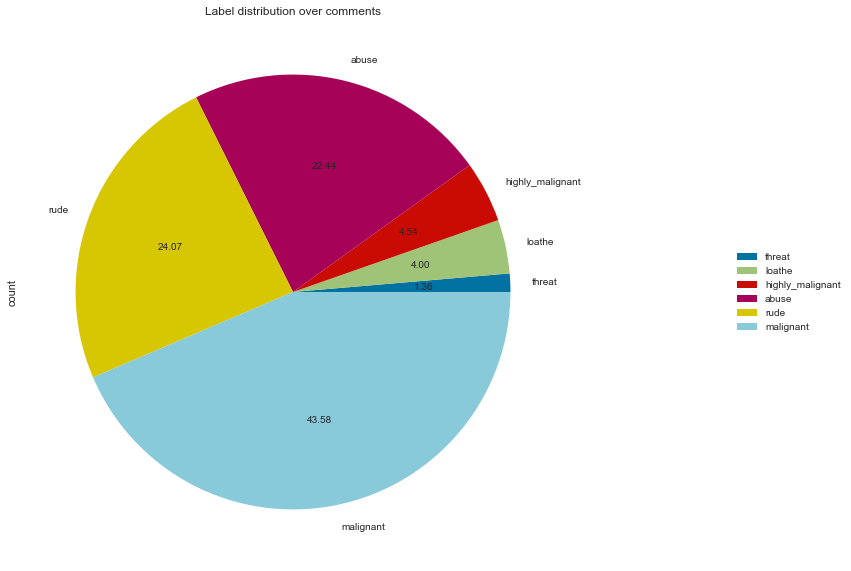

In [129]:
# Visualizing the label distribution of comments using pie chart

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

Here we will use word cloud to visualize most frequent words used in the tweets.

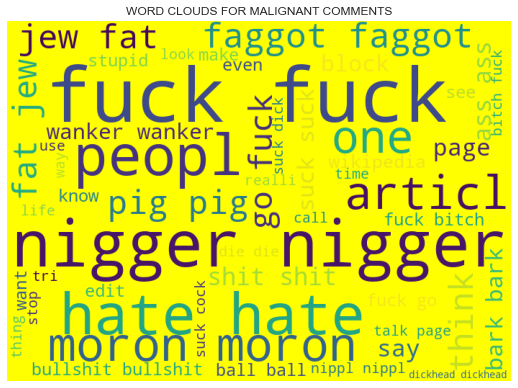

In [130]:
malignant = df['comment_text'][df['malignant']==1]
wordcloud = WordCloud(width=700,height=500,background_color='yellow',max_words=50).generate(' '.join(malignant))
plt.figure(figsize = (7,5), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR MALIGNANT COMMENTS')
plt.show()

Observation:
From wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.

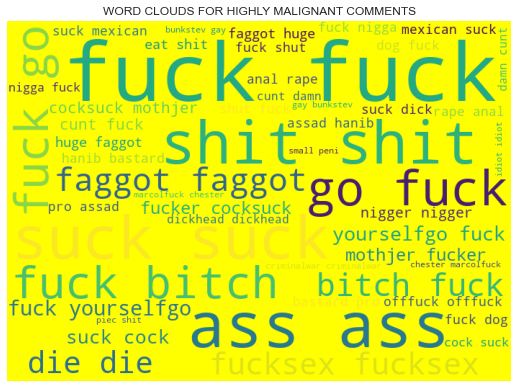

In [131]:
highly_malignant = df['comment_text'][df['highly_malignant']==1]
wordcloud = WordCloud(width=700,height=500,background_color='yellow',max_words=50).generate(' '.join(highly_malignant))
plt.figure(figsize = (7,5), facecolor = 'white', edgecolor='red') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR HIGHLY MALIGNANT COMMENTS')
plt.show()


Observation:
From wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.


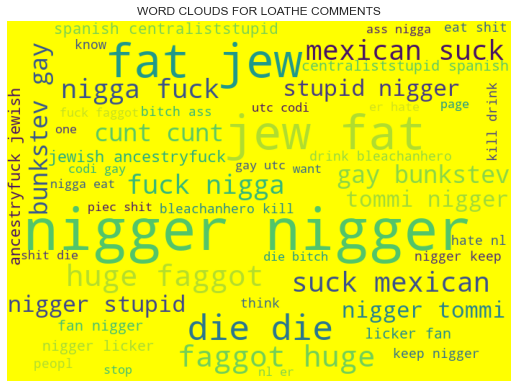

In [132]:
loathe = df['comment_text'][df['loathe']==1]
wordcloud = WordCloud(width=700,height=500,background_color='yellow',max_words=50).generate(' '.join(loathe))
plt.figure(figsize = (7,5), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR LOATHE COMMENTS')
plt.show()

Observation:
From wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

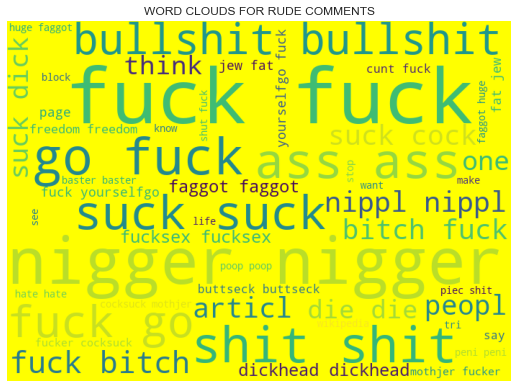

In [133]:
rude = df['comment_text'][df['rude']==1]
wordcloud = WordCloud(width=700,height=500,background_color='yellow',max_words=50).generate(' '.join(rude))
plt.figure(figsize = (7,5), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR RUDE COMMENTS')
plt.show()

Observation:
From wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.


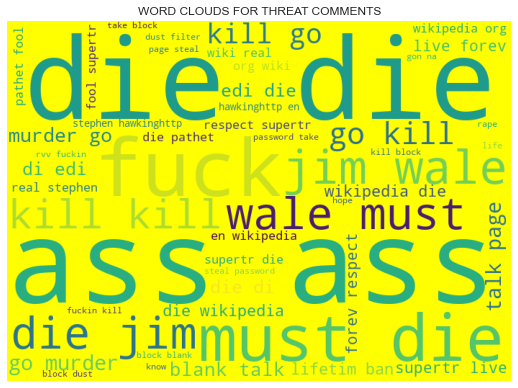

In [134]:
threat = df['comment_text'][df['threat']==1]
wordcloud = WordCloud(width=700,height=500,background_color='yellow',max_words=50).generate(' '.join(threat))
plt.figure(figsize = (7,5), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR THREAT COMMENTS')
plt.show()

Observation:
From wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.

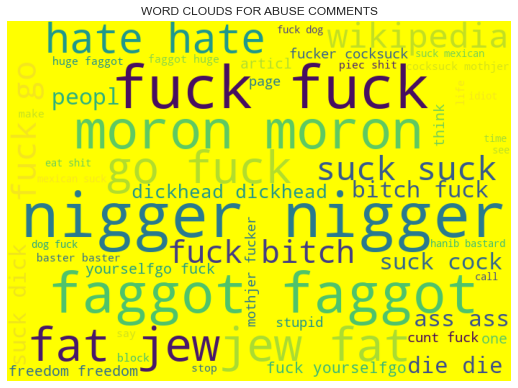

In [135]:
abuse = df['comment_text'][df['abuse']==1]
wordcloud = WordCloud(width=700,height=500,background_color='yellow',max_words=50).generate(' '.join(abuse))
plt.figure(figsize = (7,5), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WORD CLOUDS FOR ABUSE COMMENTS')
plt.show()

Observation:
From wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.

### Data Preparation for Model Training and Testing

In [136]:
# Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000)
features = tfidf.fit_transform(df.comment_text).toarray()

# Checking the shape of features
features.shape

(159571, 2000)

TF_IDF Vectoriser:The tfidf_vectorizer class implements a vectorizer for calculating term frequency/inverse document frequency (TF/IDF), which can be used as a measure for modeling the importance of terms within documents. It takes in raw texts and returns an array of feature vectors for each input text.In simple words, TFIDF is a numerical statistic that shows the importance of a word in a text document. 

In [137]:
# input variables
x = features

# output variables
y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", x.shape)
print("Output Variable Shape:", y.shape)

Input Variable Shape: (159571, 2000)
Output Variable Shape: (159571, 6)


### Model building

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.33)

In [139]:
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score as cvs, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV


# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import multilabel_confusion_matrix,hamming_loss,log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss


#splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

from sklearn.multiclass import OneVsRestClassifier

# Creating instances for different Classifiers
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()
pac=PassiveAggressiveClassifier()


#function for printing score
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Log_loss :",log_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred)) 
    print('*********************************************************\n')    
    
#models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,lgb,sgd,pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

classifier: LinearSVC
Accuracy score: 0.9196148806471828
f1_score: 0.6989039983762939
Precision :  0.8606598350412397
Recall: 0.5883307705450197
Hamming loss:  0.018781214986991777
Log_loss : 1.4647268046284174
Confusion matrix:
  [[[47183   393]
  [ 1860  3223]]

 [[52064    69]
  [  419   107]]

 [[49613   215]
  [  878  1953]]

 [[52496    11]
  [  127    25]]

 [[49640   376]
  [ 1182  1461]]

 [[52137    51]
  [  353   118]]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74      5083
           1       0.61      0.20      0.30       526
           2       0.90      0.69      0.78      2831
           3       0.69      0.16      0.27       152
           4       0.80      0.55      0.65      2643
           5       0.70      0.25      0.37       471

   micro avg       0.86      0.59      0.70     11706
   macro avg       0.76      0.42      0.52     11706
weighted avg       0.85      0.59      0.69     11706

From the above model comparision it is clear that Linear Support Vector Classifier performs better with Accuracy Score: 91.96% and Hamming Loss: 0.018% and F1_score is 70% than the other classification models,we are considering specially F1 score as the basis of evaluation of best model,as f1_score can goes well with imbalance dataset.Therefore We will use Linear Support Vector Classifier for further Hyperparameter tuning process.

#### HYPERPARAMETER TUNNING

In [140]:
parameters = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__intercept_scaling': [2,4,5],
         }
#train the model with given parameters using GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,parameters,cv = 2, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)

#printing the best parameters found by GridSearchCV
GCV.best_params_

{'estimator__intercept_scaling': 2,
 'estimator__loss': 'hinge',
 'estimator__multi_class': 'crammer_singer',
 'estimator__penalty': 'l1'}

Thus on 4 parameters have been used under the varaible parametrs that is used in gridsearchcv for finding the best result. we see the best parameters which will help in improving the performance of the model using gridserachcv.Then we use this best parameters to the gridseacrhcv function.

### FINAL MODEL

In [141]:
flmodel = OneVsRestClassifier(LinearSVC(loss='hinge',multi_class='crammer_singer', penalty ='l1',intercept_scaling=2))
flmodel.fit(x_train,y_train)
y_pred = flmodel.predict(x_test)

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
roc_auc=roc_auc_score(y_test,y_pred)
print("roc_auc_score",roc_auc*100)
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("Log_loss :",log_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

flmodel.predict(x)

Accuracy score: 0.9177158700317135
roc_auc_score 67.11714849428851
f1_score: 0.6896869716686307
Precision :  0.8615128631767567
Recall: 0.5750042713138561
Hamming loss:  0.01917051216316299
Log_loss : 1.535319085721115

Confusion matrix: 
 [[[47185   391]
  [ 1881  3202]]

 [[52132     1]
  [  519     7]]

 [[49587   241]
  [  873  1958]]

 [[52507     0]
  [  149     3]]

 [[49588   428]
  [ 1157  1486]]

 [[52167    21]
  [  396    75]]]


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Thus our final models shows the accuracy score of 91.77%,f1_score of 69%,roc_auc_score 67.12%,
Precision:86.15%,Recall:57.50%,Hamming loss:0.019,Log_loss : 1.53.
                
Hamming loss:Hamming loss is the fraction of wrong labels to the total number of labels. In multi-class classification, hamming loss is calculated as the hamming distance between y_true and y_pred.It is always between 0 and 1, lower being better. 

Log_loss:Log Loss is the most important classification metric based on probabilities. For any given problem, a lower log loss value means better predictions.Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [ ]:
#!pip install yellowbrick

### Class Prediction Error

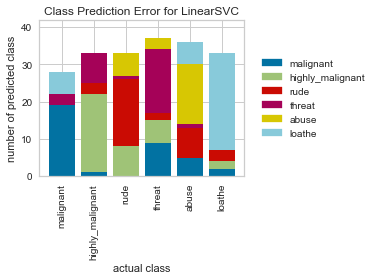

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [155]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ClassPredictionError


# Create classification dataset
x, y = make_classification(
    n_samples=1000, n_classes=6, n_informative=3, n_clusters_per_class=1,
    random_state=36,
)

classes = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

# Perform 80/20 training/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=42)
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    LinearSVC(random_state=42), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)

# Evaluate the model on the test data
visualizer.score(x_test, y_test)

# Draw visualization
visualizer.show()

The Yellowbrick ClassPredictionError plot is a twist on other and sometimes more familiar classification model diagnostic tools like the Confusion Matrix and Classification Report. Like the Classification Report, this plot shows the support (number of training samples) for each class in the fitted classification model as a stacked bar chart. Each bar is segmented to show the proportion of predictions (including false negatives and false positives, like a Confusion Matrix) for each class. We can use a ClassPredictionError to visualize which classes the classifier is having a particularly difficult time with, and more importantly, what incorrect answers it is giving on a per-class basis. This can often enable us to better understand strengths and weaknesses of different models and particular challenges unique to the dataset.

The class prediction error chart provides a way to quickly understand how good your classifier is at predicting the right classes.

Thus in the above example, while the LinearSVC appears to be fairly good at correctly predicting malignant based on the features of the toxic comments, it often incorrectly labels rude as hihly_malignant and mistakes hihly malignant for loathe.Using these new insights, one could easily detect the features causing issues and quickly address the problem.

### ROC_AUC CURVE USING YELLOWBRIC

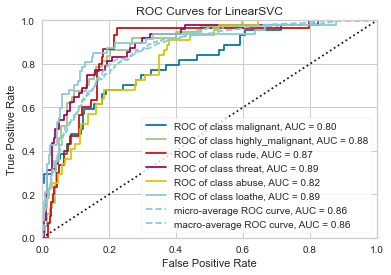

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['malignant', 'highly_malignant', 'rude', 'threat', 'abuse',
                'loathe'],
       estimator=LinearSVC())

In [160]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


#Create the train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Instantiate the visualizer with the classification model
model = LinearSVC()
roc_auc(model, x_train, y_train, x_test,y_test, classes=['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'])

ROC_AUC is generally used for binary classification, however, Yellowbrick's ROC_AUC does allow for multi-class classification. It did a better job displaying ROC_AUC curve. The graph displays the ROC for each class as well as the micro and macro averages. The micro averages are computed from the sum of all true positives and false positives across all classes and the macro averages are the averages of curves across all classes.

ROC curves are typically used in binary classification, and in fact the Scikit-Learn roc_curve metric is only able to perform metrics for binary classifiers. As a result it is necessary to binarize the output or to use one-vs-rest or one-vs-all strategies of classification. The visualizer does its best to handle multiple situations, but exceptions can arise from unexpected models or outputs.

Thus we can see for malignant,auc_roc score is 80%,for hihgly_malignant,its 88%,for class rude ,its 87%,for class threat-it is showing 89%,for class abuse,it is 82% and for class loathe is 89%.Thus it is well able to disntigush toxic comments for the different classes.

### Saving the Model

In [161]:
import joblib
joblib.dump(flmodel,"Malignant_comment_classifier.pkl")
#loading the model
model = joblib.load('Malignant_comment_classifier.pkl')

I am using the joblib option to save the final classification model

### Prediction for test dataset using final model

In [162]:
df_test.drop(columns=['id'],inplace=True)

In [163]:
dft = df_test.copy()
dft['original_length'] = df_test.comment_text.str.len()

dft.head()

,comment_text,original_length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


#### Performing data cleaning as same as on test_dataset

In [164]:
# Removing and Replacing unwanted characters in the comment_text column

# Replacing '\n' with ' '
dft.comment_text = dft.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
dft.comment_text = dft.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Removing Stop Words and Punctuations

# Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'only', 'ilu', 'or', 'from', 'so', 'at', "he's", 'above', 'herself', 'has', 'both', 'nvm', 'c', "wouldn't", 'on', "isn't", 'while', 'is', 'into', 'hers', 'which', 'few', 'such', 'lmfao', 'not', 'i', 'his', 'yolo', 'we', 'to', 'own', 'ain', 'o', 'doing', 'mustn', 'any', 'she', 'that', "doesn't", 'don', "you've", 'yourself', "hadn't", "that's", "he'll", 'j', 'oh', 'ma', "hasn't", 'r', 'who', 'other', "i'm", 'before', "mustn't", 'bbq', 'and', 'in', 'below', 'won', 'heh', 'were', 'an', 'didn', 'all', 'through', 'some', "should've", 'he', 'how', 'u', "you'll", "can't", 'did', 'they', "wasn't", 'ofc', 'hmm', 'rofl', 'out', 'why', 'hasn', 'ur', 's', 'by', 'theirs', 're', 'wasn', 'shan', 'p', 'once', "she'll", "haven't", 'it', 'as', 'between', 'about', "it's", 'ourselves', 'does', 'more', 'being', 'been', 'omg', 'smh', 'aren', 'its', 't', 'when', 'then', 'up', 'had', 'her', "i've", 'the', "mightn't", 'e', 'will', 'but', 'nt', 'needn', 'if', 'you

In [165]:
 #Removing stop words
dft.comment_text = dft.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Removing punctuations
dft.comment_text = dft.comment_text.str.replace("[^\w\d\s]","")

dft.sample(15)

,comment_text,original_length
109894,hanks support ve made administrator ll best let,125
99984,erbia nikada nije imala adranskjo ore nikada n...,70
15791,ell good faith assumed certainly want accuse a...,904
10025,im ear hank appreciate reply im ear page,78
134991,age uestion ello trying edit yron allimores pa...,404
123326,give poor metal colour,60
60239,seem able copy paste contents block infobox in...,110
131278,think fact uses word affordable questionable f...,353
82590,white ey yo remember shit azy back otherfucker...,3638
130885,top whining correct environment capable evil,74


In [166]:
#Stemming words
snb_stem = SnowballStemmer('english')
dft.comment_text = dft.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))
dft.sample(15)

,comment_text,original_length
113600,interpret comment oni way oni sometim complet ...,475
85502,utrit hould nutrit therapi includ qualiti arti...,223
135664,hat argument name call ts better far content s...,116
45933,mod gay,20
101229,hom sexual ped phile http www vice com read ev...,192
69471,nclude inform statement substanti document sta...,129
101374,efinit mea would sign four tild,53
51653,read child nexplain magazin load great thing l...,376
67015,click back page evil thing ucaspet,55
82153,peni sourc ant see,34


In [167]:
# Checking the length of comment_text after cleaning and storing it in cleaned_length variable
dft["cleaned_length"] = dft.comment_text.str.len()
dft.head(10)

,comment_text,original_length,cleaned_length
0,bitch ule succes ever what hate sad mofucka bi...,367,215
1,rom titl fine,50,13
2,ourc awe shton apland,54,21
3,look back sourc inform updat correct form gues...,205,91
4,anonym edit articl,41,18
5,hank understand think high would revert withou...,96,55
6,leas add nonsens ikipedia uch edit consid vand...,176,109
7,ear god site horribl,32,20
8,nli fool believ number correct number lie onde...,556,256
9,oubl edirect hen fix doubl redirect blank oute...,224,120


In [171]:
# Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000)
features = tfidf.fit_transform(dft.comment_text).toarray()

# Checking the shape of features
features.shape

(153164, 2000)

In [172]:
# Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_comment_classifier.pkl')

In [173]:
# Make predictions and view the results
predict_test = model_loaded.predict(features)

In [174]:
predict_test

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [175]:
# Saving predicted values into a CSV file
pd.DataFrame(predict_test).to_csv('Predicted_test_output.csv')

In [176]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1

,Unnamed: 0,0,1,2,3,4,5
0,0,1,0,1,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,1,0,1,0,0,0
...,...,...,...,...,...,...,...
153159,153159,0,0,0,0,0,0
153160,153160,1,0,1,0,0,0
153161,153161,0,0,0,0,0,0
153162,153162,0,0,0,0,0,0


In [177]:
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)

In [178]:
df2=dft.copy()
dffinal = pd.concat([df2, df1], axis=1)
dffinal

,comment_text,original_length,cleaned_length,malignant,highly_malignant,rude,threat,abuse,loathe
0,bitch ule succes ever what hate sad mofucka bi...,367,215,1,0,1,0,0,0
1,rom titl fine,50,13,0,0,0,0,0,0
2,ourc awe shton apland,54,21,0,0,0,0,0,0
3,look back sourc inform updat correct form gues...,205,91,0,0,0,0,0,0
4,anonym edit articl,41,18,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
153159,total agre stuff noth long crap,60,31,0,0,0,0,0,0
153160,hrow field home plate oe get faster throw cut ...,198,107,1,0,1,0,0,0
153161,kinotorishima categori see chang agre correct ...,423,205,0,0,0,0,0,0
153162,ne found nation ermani aw eturn quit similar s...,502,277,0,0,0,0,0,0


In [179]:
dffinal.to_csv('Malignant_predictions.csv', index=False)